## A.I. Assignment 7

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with computer vision concepts
* Understand Convolutions
* Understand and trainsimple models
* Undertstand pooling and train convolutional model


### Task

In the context of image processing, a kernel is a small matrix of numbers that is applied to an image to perform operations such as blurring, sharpening, edge detection, and more. The kernel is usually a square matrix with odd dimensions, such as 3x3 or 5x5.

We will train simple models using liniear layers and non linear layers that we learned how to use in the previous labs and then train a convolutional neural network and compare the results





# Computer Vision Intro


[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)).

Or whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Or identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)).

Or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)


## Storing Images in PyTorch

In PyTorch, images are typically stored as tensors, which are multi-dimensional arrays. For example, a grayscale image with dimensions 128 x 128 pixels would be represented as a tensor with shape (1, 128, 128), where the first dimension represents the number of color channels (in this case 1 for grayscale), and the remaining dimensions represent the height and width of the image.

Similarly, a color image with dimensions 128 x 128 pixels would be represented as a tensor with shape (3, 128, 128), where the first dimension represents the number of color channels (in this case 3 for red, green, and blue), and the remaining dimensions represent the height and width of the image.

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load an image file into a PyTorch tensor
image = torchvision.io.read_image('corgi.jpg')

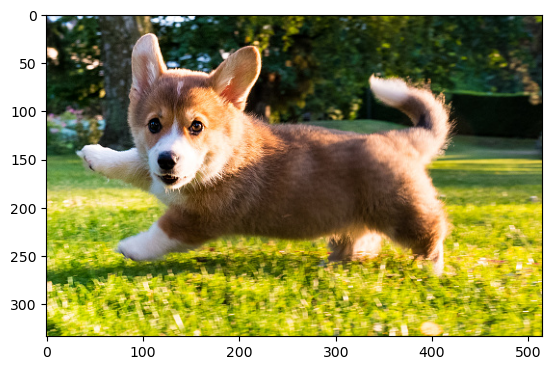

In [3]:
# Create a grid of images
grid = torchvision.utils.make_grid(image)

# Display the grid using matplotlib
plt.imshow(grid.permute(1, 2, 0))
plt.show()

## Images in numpy

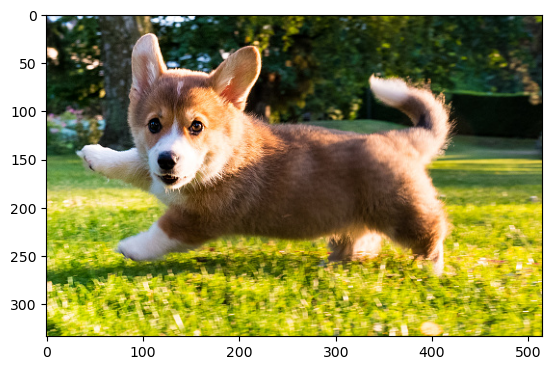

In [4]:
# Load an image file into a Python array
image = Image.open('corgi.jpg')
image_array = np.array(image)

# Display the image using matplotlib
plt.imshow(image_array)
plt.show()

# What is a convolution ?

## Problems with the Fully-connected nn 
### Fully-Connected = What we did with linear layers and activations 
- Do you need to consider all the relations between the features?
- Fully connected nn are big and so very computationally inefficient
- They have so many parameters, and so overfit
## Main idea of CNN
- Units are connected with only a few units from the previous layer
- Units share weights
### Main Idea
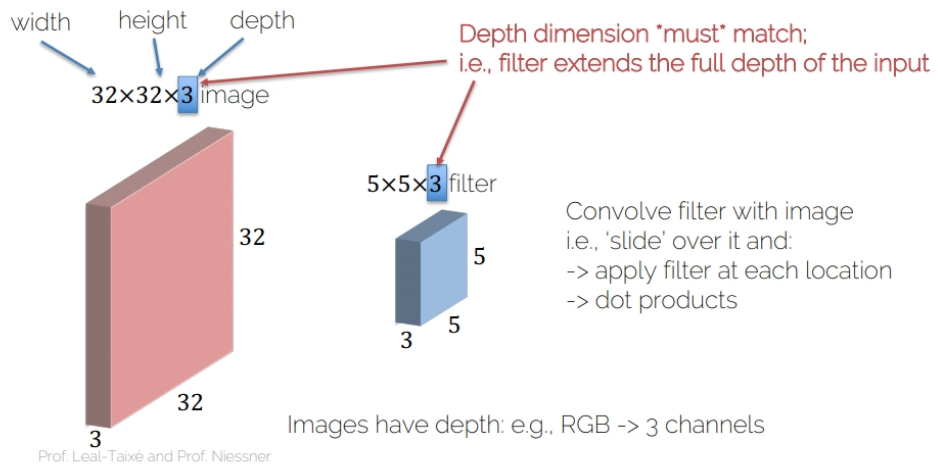!
### Convolving operation
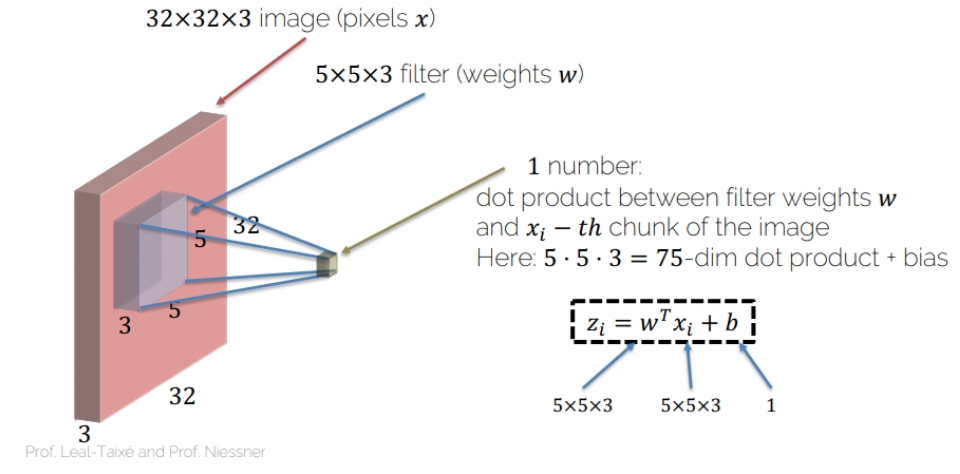!
### Resulting activation map
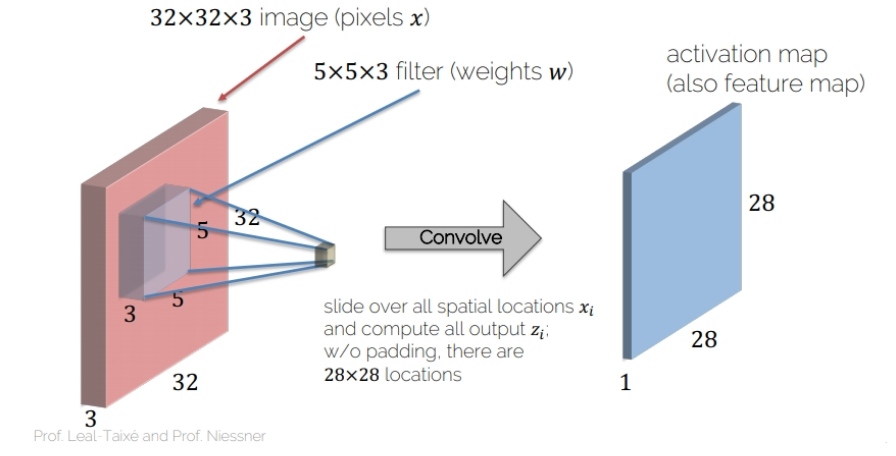!

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

In [6]:
images = torch.rand(10, 1, 28, 28)

# Build 6 conv. filters
conv_filters = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, padding=1)

# Convolve the image with the filters
output_feature = conv_filters(images)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


In [6]:
# Applying the convolution we get 6 filters

## Let's apply the convolution on the corgi

In [7]:
# Load an image file into a PyTorch tensor
image = torchvision.io.read_image('corgi.jpg').float()

# Normalize the pixel values to be between 0 and 1
image /= 255.0

In [8]:
# Define a convolutional filter with 3 input channels, 10 output channels, and a kernel size of 3
conv_filter = nn.Conv2d(3, 10, kernel_size=3)

In [9]:
print(image.shape)

torch.Size([3, 334, 515])


In [10]:
output = conv_filter(image)

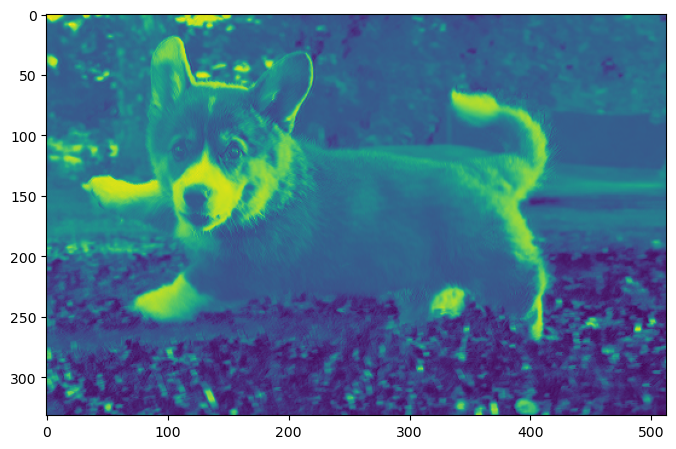

In [11]:
# Create a grid of images
grid = torchvision.utils.make_grid(output)
# Display the grid using matplotlib
plt.imshow(output.detach()[2]) # One 0 is the batch and one is the signal (RGB)
plt.show()

#This is just 1 random filter

torch.Size([3, 334, 515])


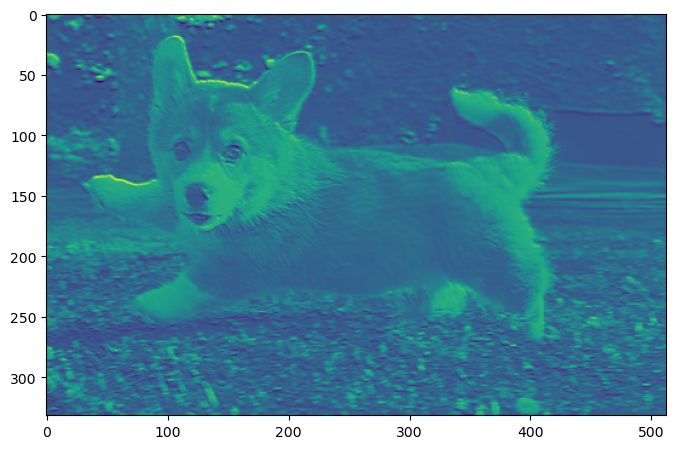

In [24]:
# Ex 1: Look at some other channels

# Load an image file into a PyTorch tensor
image = torchvision.io.read_image('corgi.jpg').float()

# Normalize the pixel values to be between 0 and 1
image /= 255.0

# Define a convolutional filter with 3 input channels, 100 output channels, and a kernel size of 3
conv_filter = nn.Conv2d(3, 100, kernel_size=3)

print(image.shape)

output = conv_filter(image)

# Create a grid of images
grid = torchvision.utils.make_grid(output)

# Display the grid using matplotlib
plt.imshow(output.detach()[2]) # One 0 is the batch and one is the signal (RGB)
plt.show()

#This is just 1 random filter

## Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iteralbe over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


## 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup. 

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [17]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [18]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Various problems will have various input and output shapes. But the premise reamins: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.*

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

In [19]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
# Ex 1 Print the len of the train and test datasets
print(len(train_data))
print(len(test_data))

60000
10000


Image shape: torch.Size([1, 28, 28])


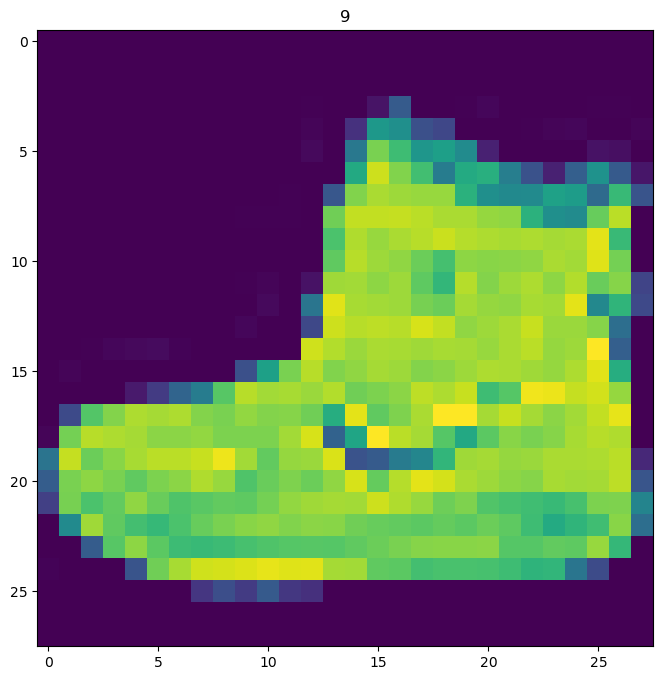

In [21]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

Image shape: torch.Size([1, 28, 28])


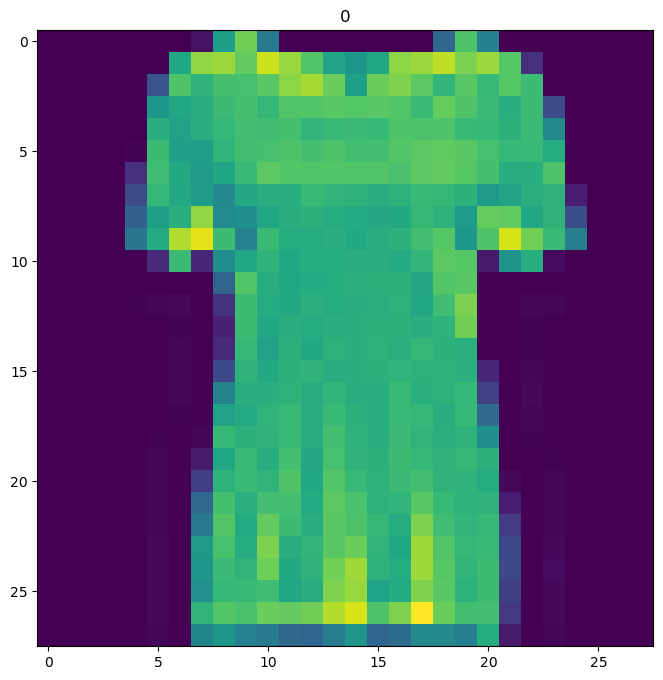

In [22]:
# Now let's look at some random images

# Ex 3 Access some random data from train_data
image, label = train_data[10]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])


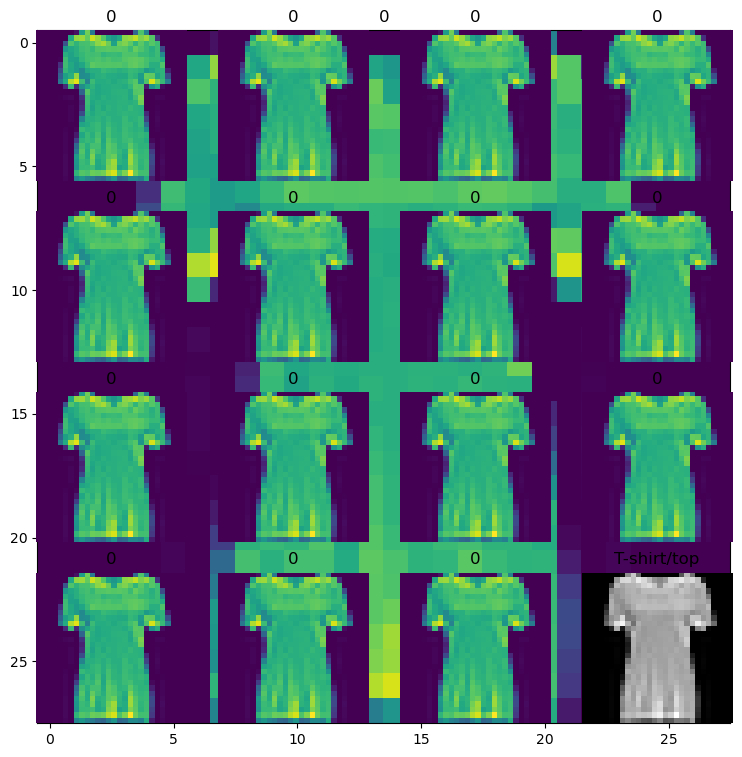

In [23]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    
    # Ex 3 here
    image, label = train_data[10]
    print(f"Image shape: {image.shape}")
    plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
    plt.title(label);

    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

In [24]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f7ca04f5e50>, <torch.utils.data.dataloader.DataLoader object at 0x7f7c9f7a0e20>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# First Dumb Model

Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

In [25]:
# Check out what's inside the training dataloader
# This is how we get some random samples
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [61]:
# Ex 4 Use Flatten + 2x Linear layer for the base model
nn.Flatten()
nn.Linear(input_shape, hidden_units)
nn.ReLU()
nn.Linear(hidden_units, output_shape)

In [26]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            # Ex 4 here
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [27]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)


In [28]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [36]:
# Ex 5 Define the loss as Cross Entropy loss and the sgd optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [30]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Epoch [1/3], Step [3/1875], Loss: 0.3687
Epoch [1/3], Step [6/1875], Loss: 0.3312
Epoch [1/3], Step [9/1875], Loss: 0.5627
Epoch [1/3], Step [12/1875], Loss: 0.5132
Epoch [1/3], Step [15/1875], Loss: 0.5048
Epoch [1/3], Step [18/1875], Loss: 0.3106
Epoch [1/3], Step [21/1875], Loss: 0.4174
Epoch [1/3], Step [24/1875], Loss: 0.3332
Epoch [1/3], Step [27/1875], Loss: 0.5503
Epoch [1/3], Step [30/1875], Loss: 0.4032
Epoch [1/3], Step [33/1875], Loss: 0.2707
Epoch [1/3], Step [36/1875], Loss: 0.2338
Epoch [1/3], Step [39/1875], Loss: 0.2011
Epoch [1/3], Step [42/1875], Loss: 0.3419
Epoch [1/3], Step [45/1875], Loss: 0.4676
Epoch [1/3], Step [48/1875], Loss: 0.3094
Epoch [1/3], Step [51/1875], Loss: 0.3952
Epoch [1/3], Step [54/1875], Loss: 0.5763
Epoch [1/3], Step [57/1875], Loss: 0.1552
Epoch [1/3], Step [60/1875], Loss: 0.4308
Epoch [1/3], Step [63/1875], Loss: 0.1951
Epoch [1/3], Step [66/1875], Loss: 0.4344
Epoch [1/3], Step [69/1875], Loss: 0.4804
Epoch [1/3], Step [72/1875], Loss: 0.

Epoch [1/3], Step [612/1875], Loss: 0.4960
Epoch [1/3], Step [615/1875], Loss: 0.4589
Epoch [1/3], Step [618/1875], Loss: 0.3575
Epoch [1/3], Step [621/1875], Loss: 0.3912
Epoch [1/3], Step [624/1875], Loss: 0.4806
Epoch [1/3], Step [627/1875], Loss: 0.2686
Epoch [1/3], Step [630/1875], Loss: 0.2388
Epoch [1/3], Step [633/1875], Loss: 0.4551
Epoch [1/3], Step [636/1875], Loss: 0.3327
Epoch [1/3], Step [639/1875], Loss: 0.6042
Epoch [1/3], Step [642/1875], Loss: 0.2474
Epoch [1/3], Step [645/1875], Loss: 0.2790
Epoch [1/3], Step [648/1875], Loss: 0.3534
Epoch [1/3], Step [651/1875], Loss: 0.1625
Epoch [1/3], Step [654/1875], Loss: 0.3972
Epoch [1/3], Step [657/1875], Loss: 0.9387
Epoch [1/3], Step [660/1875], Loss: 0.5081
Epoch [1/3], Step [663/1875], Loss: 0.3962
Epoch [1/3], Step [666/1875], Loss: 0.1656
Epoch [1/3], Step [669/1875], Loss: 0.6168
Epoch [1/3], Step [672/1875], Loss: 0.8271
Epoch [1/3], Step [675/1875], Loss: 0.3769
Epoch [1/3], Step [678/1875], Loss: 0.3055
Epoch [1/3]

Epoch [1/3], Step [1203/1875], Loss: 0.2220
Epoch [1/3], Step [1206/1875], Loss: 0.5714
Epoch [1/3], Step [1209/1875], Loss: 0.3581
Epoch [1/3], Step [1212/1875], Loss: 0.1758
Epoch [1/3], Step [1215/1875], Loss: 0.2646
Epoch [1/3], Step [1218/1875], Loss: 0.4361
Epoch [1/3], Step [1221/1875], Loss: 0.4249
Epoch [1/3], Step [1224/1875], Loss: 0.5171
Epoch [1/3], Step [1227/1875], Loss: 0.4233
Epoch [1/3], Step [1230/1875], Loss: 0.2508
Epoch [1/3], Step [1233/1875], Loss: 0.3700
Epoch [1/3], Step [1236/1875], Loss: 0.4307
Epoch [1/3], Step [1239/1875], Loss: 0.2257
Epoch [1/3], Step [1242/1875], Loss: 0.2187
Epoch [1/3], Step [1245/1875], Loss: 0.3505
Epoch [1/3], Step [1248/1875], Loss: 0.2359
Epoch [1/3], Step [1251/1875], Loss: 0.2570
Epoch [1/3], Step [1254/1875], Loss: 0.3190
Epoch [1/3], Step [1257/1875], Loss: 0.1993
Epoch [1/3], Step [1260/1875], Loss: 0.4132
Epoch [1/3], Step [1263/1875], Loss: 0.2982
Epoch [1/3], Step [1266/1875], Loss: 0.2661
Epoch [1/3], Step [1269/1875], L

Epoch [1/3], Step [1770/1875], Loss: 0.6226
Epoch [1/3], Step [1773/1875], Loss: 0.6341
Epoch [1/3], Step [1776/1875], Loss: 0.7188
Epoch [1/3], Step [1779/1875], Loss: 0.3245
Epoch [1/3], Step [1782/1875], Loss: 0.3291
Epoch [1/3], Step [1785/1875], Loss: 0.2435
Epoch [1/3], Step [1788/1875], Loss: 0.3035
Epoch [1/3], Step [1791/1875], Loss: 0.3522
Epoch [1/3], Step [1794/1875], Loss: 0.5665
Epoch [1/3], Step [1797/1875], Loss: 0.3082
Epoch [1/3], Step [1800/1875], Loss: 0.3163
Epoch [1/3], Step [1803/1875], Loss: 0.7425
Epoch [1/3], Step [1806/1875], Loss: 0.4506
Epoch [1/3], Step [1809/1875], Loss: 0.3996
Epoch [1/3], Step [1812/1875], Loss: 0.5055
Epoch [1/3], Step [1815/1875], Loss: 0.4166
Epoch [1/3], Step [1818/1875], Loss: 0.2854
Epoch [1/3], Step [1821/1875], Loss: 0.4312
Epoch [1/3], Step [1824/1875], Loss: 0.2160
Epoch [1/3], Step [1827/1875], Loss: 0.4173
Epoch [1/3], Step [1830/1875], Loss: 0.9260
Epoch [1/3], Step [1833/1875], Loss: 0.3092
Epoch [1/3], Step [1836/1875], L

Epoch [2/3], Step [486/1875], Loss: 0.2826
Epoch [2/3], Step [489/1875], Loss: 0.3362
Epoch [2/3], Step [492/1875], Loss: 0.2033
Epoch [2/3], Step [495/1875], Loss: 0.2725
Epoch [2/3], Step [498/1875], Loss: 0.3246
Epoch [2/3], Step [501/1875], Loss: 0.1951
Epoch [2/3], Step [504/1875], Loss: 0.2031
Epoch [2/3], Step [507/1875], Loss: 0.3099
Epoch [2/3], Step [510/1875], Loss: 0.4927
Epoch [2/3], Step [513/1875], Loss: 0.5179
Epoch [2/3], Step [516/1875], Loss: 0.5620
Epoch [2/3], Step [519/1875], Loss: 0.4150
Epoch [2/3], Step [522/1875], Loss: 0.4575
Epoch [2/3], Step [525/1875], Loss: 0.2955
Epoch [2/3], Step [528/1875], Loss: 0.2835
Epoch [2/3], Step [531/1875], Loss: 0.3966
Epoch [2/3], Step [534/1875], Loss: 0.4690
Epoch [2/3], Step [537/1875], Loss: 0.2131
Epoch [2/3], Step [540/1875], Loss: 0.2743
Epoch [2/3], Step [543/1875], Loss: 0.6222
Epoch [2/3], Step [546/1875], Loss: 0.1595
Epoch [2/3], Step [549/1875], Loss: 0.4864
Epoch [2/3], Step [552/1875], Loss: 0.3085
Epoch [2/3]

Epoch [2/3], Step [1062/1875], Loss: 0.3304
Epoch [2/3], Step [1065/1875], Loss: 0.2440
Epoch [2/3], Step [1068/1875], Loss: 0.5269
Epoch [2/3], Step [1071/1875], Loss: 0.0914
Epoch [2/3], Step [1074/1875], Loss: 0.2755
Epoch [2/3], Step [1077/1875], Loss: 0.4741
Epoch [2/3], Step [1080/1875], Loss: 0.2079
Epoch [2/3], Step [1083/1875], Loss: 0.2636
Epoch [2/3], Step [1086/1875], Loss: 0.2707
Epoch [2/3], Step [1089/1875], Loss: 0.4868
Epoch [2/3], Step [1092/1875], Loss: 0.2904
Epoch [2/3], Step [1095/1875], Loss: 0.2926
Epoch [2/3], Step [1098/1875], Loss: 0.4445
Epoch [2/3], Step [1101/1875], Loss: 0.4621
Epoch [2/3], Step [1104/1875], Loss: 0.3391
Epoch [2/3], Step [1107/1875], Loss: 0.5515
Epoch [2/3], Step [1110/1875], Loss: 0.6023
Epoch [2/3], Step [1113/1875], Loss: 0.1712
Epoch [2/3], Step [1116/1875], Loss: 0.4592
Epoch [2/3], Step [1119/1875], Loss: 0.4155
Epoch [2/3], Step [1122/1875], Loss: 0.3584
Epoch [2/3], Step [1125/1875], Loss: 0.2202
Epoch [2/3], Step [1128/1875], L

Epoch [2/3], Step [1650/1875], Loss: 0.2766
Epoch [2/3], Step [1653/1875], Loss: 0.2913
Epoch [2/3], Step [1656/1875], Loss: 0.5416
Epoch [2/3], Step [1659/1875], Loss: 0.3653
Epoch [2/3], Step [1662/1875], Loss: 0.3126
Epoch [2/3], Step [1665/1875], Loss: 0.4536
Epoch [2/3], Step [1668/1875], Loss: 0.5088
Epoch [2/3], Step [1671/1875], Loss: 0.5324
Epoch [2/3], Step [1674/1875], Loss: 0.3300
Epoch [2/3], Step [1677/1875], Loss: 0.3435
Epoch [2/3], Step [1680/1875], Loss: 0.7551
Epoch [2/3], Step [1683/1875], Loss: 0.2450
Epoch [2/3], Step [1686/1875], Loss: 0.1883
Epoch [2/3], Step [1689/1875], Loss: 0.3826
Epoch [2/3], Step [1692/1875], Loss: 0.4397
Epoch [2/3], Step [1695/1875], Loss: 0.6762
Epoch [2/3], Step [1698/1875], Loss: 0.5798
Epoch [2/3], Step [1701/1875], Loss: 0.2919
Epoch [2/3], Step [1704/1875], Loss: 0.5571
Epoch [2/3], Step [1707/1875], Loss: 0.3971
Epoch [2/3], Step [1710/1875], Loss: 0.6534
Epoch [2/3], Step [1713/1875], Loss: 0.3469
Epoch [2/3], Step [1716/1875], L

Epoch [3/3], Step [351/1875], Loss: 0.2544
Epoch [3/3], Step [354/1875], Loss: 0.3708
Epoch [3/3], Step [357/1875], Loss: 0.4801
Epoch [3/3], Step [360/1875], Loss: 0.3507
Epoch [3/3], Step [363/1875], Loss: 0.5470
Epoch [3/3], Step [366/1875], Loss: 0.5669
Epoch [3/3], Step [369/1875], Loss: 0.4619
Epoch [3/3], Step [372/1875], Loss: 0.4073
Epoch [3/3], Step [375/1875], Loss: 0.3933
Epoch [3/3], Step [378/1875], Loss: 0.2253
Epoch [3/3], Step [381/1875], Loss: 0.2996
Epoch [3/3], Step [384/1875], Loss: 0.2530
Epoch [3/3], Step [387/1875], Loss: 0.4833
Epoch [3/3], Step [390/1875], Loss: 0.2179
Epoch [3/3], Step [393/1875], Loss: 0.5054
Epoch [3/3], Step [396/1875], Loss: 0.3585
Epoch [3/3], Step [399/1875], Loss: 0.5342
Epoch [3/3], Step [402/1875], Loss: 0.4537
Epoch [3/3], Step [405/1875], Loss: 0.3993
Epoch [3/3], Step [408/1875], Loss: 0.2434
Epoch [3/3], Step [411/1875], Loss: 0.5037
Epoch [3/3], Step [414/1875], Loss: 0.3103
Epoch [3/3], Step [417/1875], Loss: 0.4915
Epoch [3/3]

Epoch [3/3], Step [936/1875], Loss: 0.5371
Epoch [3/3], Step [939/1875], Loss: 0.4702
Epoch [3/3], Step [942/1875], Loss: 0.2372
Epoch [3/3], Step [945/1875], Loss: 0.9415
Epoch [3/3], Step [948/1875], Loss: 0.3807
Epoch [3/3], Step [951/1875], Loss: 0.4187
Epoch [3/3], Step [954/1875], Loss: 0.5493
Epoch [3/3], Step [957/1875], Loss: 0.2884
Epoch [3/3], Step [960/1875], Loss: 0.2292
Epoch [3/3], Step [963/1875], Loss: 0.2329
Epoch [3/3], Step [966/1875], Loss: 0.5622
Epoch [3/3], Step [969/1875], Loss: 0.3068
Epoch [3/3], Step [972/1875], Loss: 0.3945
Epoch [3/3], Step [975/1875], Loss: 0.1987
Epoch [3/3], Step [978/1875], Loss: 0.2809
Epoch [3/3], Step [981/1875], Loss: 0.4335
Epoch [3/3], Step [984/1875], Loss: 0.2743
Epoch [3/3], Step [987/1875], Loss: 0.2452
Epoch [3/3], Step [990/1875], Loss: 0.4565
Epoch [3/3], Step [993/1875], Loss: 0.4453
Epoch [3/3], Step [996/1875], Loss: 0.5439
Epoch [3/3], Step [999/1875], Loss: 0.2232
Epoch [3/3], Step [1002/1875], Loss: 0.7187
Epoch [3/3

Epoch [3/3], Step [1521/1875], Loss: 0.3510
Epoch [3/3], Step [1524/1875], Loss: 0.6120
Epoch [3/3], Step [1527/1875], Loss: 0.3498
Epoch [3/3], Step [1530/1875], Loss: 0.5111
Epoch [3/3], Step [1533/1875], Loss: 0.8198
Epoch [3/3], Step [1536/1875], Loss: 0.3988
Epoch [3/3], Step [1539/1875], Loss: 0.1988
Epoch [3/3], Step [1542/1875], Loss: 0.2678
Epoch [3/3], Step [1545/1875], Loss: 0.2913
Epoch [3/3], Step [1548/1875], Loss: 0.4016
Epoch [3/3], Step [1551/1875], Loss: 0.5058
Epoch [3/3], Step [1554/1875], Loss: 0.2198
Epoch [3/3], Step [1557/1875], Loss: 0.2830
Epoch [3/3], Step [1560/1875], Loss: 0.3522
Epoch [3/3], Step [1563/1875], Loss: 0.4295
Epoch [3/3], Step [1566/1875], Loss: 0.7795
Epoch [3/3], Step [1569/1875], Loss: 0.3313
Epoch [3/3], Step [1572/1875], Loss: 0.1470
Epoch [3/3], Step [1575/1875], Loss: 0.4718
Epoch [3/3], Step [1578/1875], Loss: 0.3312
Epoch [3/3], Step [1581/1875], Loss: 0.2559
Epoch [3/3], Step [1584/1875], Loss: 0.3586
Epoch [3/3], Step [1587/1875], L

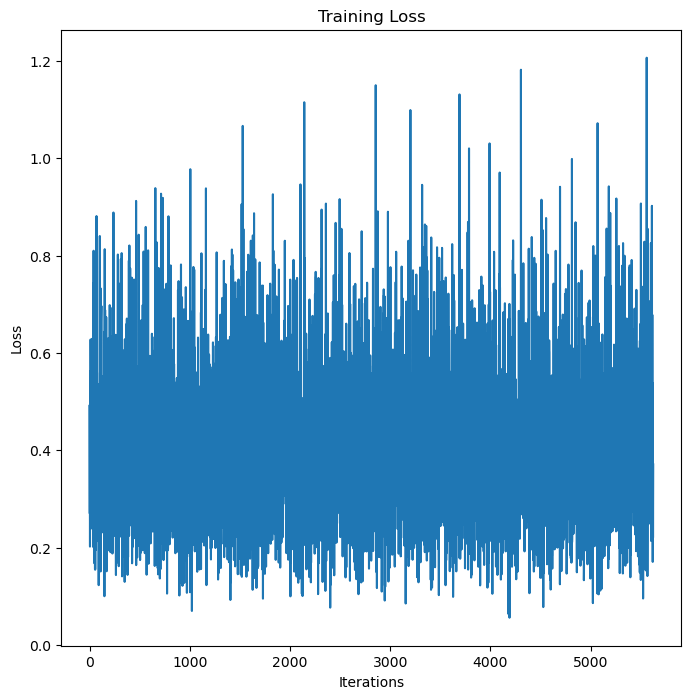

In [58]:
# Ex 6 Create a loss_values_arr and plot it after the training loop

# Start the training loop
num_epochs = 3
loss_values_arr = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # Move images and labels to device
        # images = images.to(device)
        # labels = labels.to(device)
        
        # Forward pass
        outputs = model_0(images)
        loss = loss_fn(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Store the loss value
        loss_values_arr.append(loss.item())
        
        # Print the loss and accuracy every 100 iterations
        if (i+1) % 3 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}")
        
# Plot the loss values
plt.plot(loss_values_arr)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Ex 7 Finish the training loop instructions

In [37]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


            
# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:14<00:29, 14.99s/it]


Train loss: 0.00000 | Test loss: 0.43913, Test acc: 84.56%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:27<00:13, 13.28s/it]


Train loss: 0.00000 | Test loss: 0.45400, Test acc: 84.07%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:41<00:00, 13.75s/it]


Train loss: 0.00000 | Test loss: 0.43276, Test acc: 84.92%

Train time on None: 41.271 seconds


In [ ]:
# The model is looking good

# Evaluate baseline model

In [38]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4327642321586609,
 'model_acc': 84.9241214057508}

# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
# Task 9 : Recreate the model by adding non linearities
# The model needs again to flatten the image to a 1 D array and then add in between the linear layers ReLU
# At the end you will have Flatten + Linear + ReLU + Linear + ReLU
# We also try to speed up things 

nn.Flatten(),
nn.Linear(input_shape, hidden_units),
nn.ReLU(),
nn.Linear(hidden_units, output_shape),
nn.ReLU()

In [46]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [47]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            
            #Ex 9 here
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU()
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [48]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

In [49]:
# Task 10 Create the same loss + Optimizer as for V0

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

## Make sure to use after the for loop if you are using a gpu      
# Send data to GPU
# X, y = X.to(device), y.to(device) 

In [50]:
# Task 11 Train And Test it as before

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device) 
        model_1.train() 
        # 1. Forward pass
        y_pred = model_1(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_1(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


            
# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:12<00:25, 12.80s/it]


Train loss: 0.00000 | Test loss: 0.95637, Test acc: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:26<00:13, 13.09s/it]


Train loss: 0.00000 | Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:37<00:00, 12.43s/it]


Train loss: 0.00000 | Test loss: 0.68500, Test acc: 75.02%

Train time on None: 37.317 seconds


# Building a Convolutional Neural Network

Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

### What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) | 

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're wor

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing

In [ ]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

In [76]:
# Extra Ex : Play with kernal size and stride and see what happens to the shapes

In [61]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
print(model_2)

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


# What is pooling?

`nn.MaxPool2d()` is a function in PyTorch that performs 2D max pooling over an input signal. Max pooling is a form of down-sampling that reduces the spatial size of an input tensor while retaining important information about its features.

Here's how `nn.MaxPool2d()` works:

First, the input tensor is divided into non-overlapping rectangular regions of a specified size, called "pools". For example, if the input tensor has a shape of (batch_size, num_channels, height, width), and the pooling kernel size is set to (2, 2), then the input tensor will be divided into pools of size (2, 2) along the height and width dimensions.

Next, the maximum value of each pool is computed, and the resulting values are placed into a new output tensor at the corresponding spatial location.
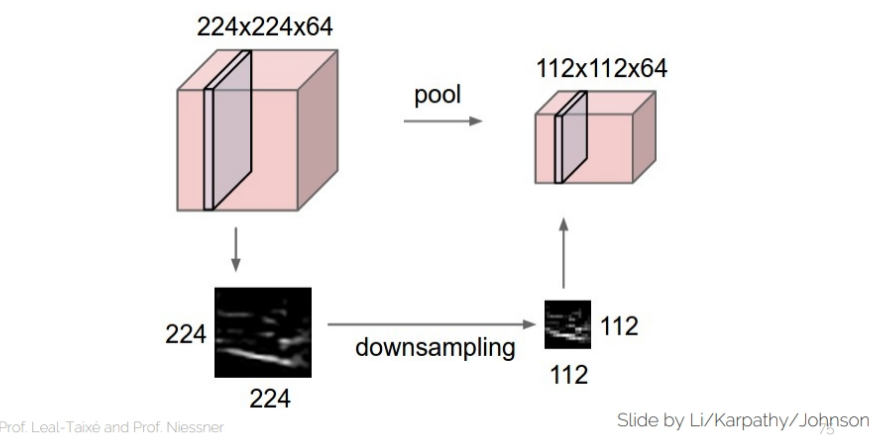!

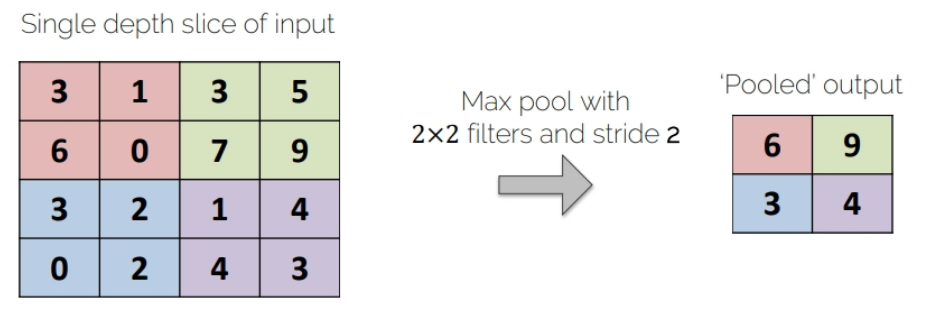!

In [62]:
import torch
import torch.nn as nn

# Create a random 2D tensor of shape (1, 1, 4, 4)
input_tensor = torch.rand(1, 1, 4, 4)

# Define a max pooling layer with a kernel size of (2, 2)
maxpool_layer = nn.MaxPool2d(kernel_size=(2, 2))

# Apply the max pooling layer to the input tensor
output_tensor = maxpool_layer(input_tensor)

# Print the input and output tensor shapes
print("Input shape:", input_tensor.shape)
print("Output shape:", output_tensor.shape)

Input shape: torch.Size([1, 1, 4, 4])
Output shape: torch.Size([1, 1, 2, 2])


In [63]:
# Ex 12 Train and evaluate this model 
# When training convert output from logits like
    # # Do the forward pass
    # y_logit = model_2(X)
    # # Turn predictions from logits -> prediction probabilities -> predictions labels
    # y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
# Also compare the results(accuracy) and the training time
    
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1) # optim.Adam(model_2.parameters(), lr=0.001)


def train(model, train_loader, optimizer, loss_fn, device):
    model.train()
    train_loss = 0
    train_acc = 0
    
    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
        y_logit = model(X)
        
        loss = loss_fn(y_logit, y)
        loss.backward()
        optimizer.step()
        
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        train_acc += (y_pred == y).sum().item()
        train_loss += loss.item()
        
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    return train_loss, train_acc


def evaluate(model, test_loader, loss_fn, device):
    model.eval()
    test_loss = 0
    test_acc = 0

    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)

            y_logit = model(X)
            loss = loss_fn(y_logit, y)

            y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
            test_acc += (y_pred == y).sum().item()
            test_loss += loss.item()
            
    test_loss /= len(test_loader.dataset)
    test_acc /= len(test_loader.dataset)
    return test_loss, test_acc

In [66]:
import time

num_epochs = 5

for epoch in range(num_epochs):
    start_time = time.time()
    
    train_loss, train_acc = train(model_2, train_dataloader, optimizer, loss_fn, device)
    test_loss, test_acc = evaluate(model_2, test_dataloader, loss_fn, device)
    
    end_time = time.time()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Time: {end_time-start_time:.2f}s")

Epoch 1/5, Train Loss: 0.0719, Train Acc: 0.1000, Test Loss: 0.0721, Test Acc: 0.1000, Time: 71.66s
Epoch 2/5, Train Loss: 0.0719, Train Acc: 0.1000, Test Loss: 0.0721, Test Acc: 0.1000, Time: 75.53s
Epoch 3/5, Train Loss: 0.0719, Train Acc: 0.1000, Test Loss: 0.0721, Test Acc: 0.1000, Time: 66.86s
Epoch 4/5, Train Loss: 0.0719, Train Acc: 0.1000, Test Loss: 0.0721, Test Acc: 0.1000, Time: 71.22s
Epoch 5/5, Train Loss: 0.0719, Train Acc: 0.1000, Test Loss: 0.0721, Test Acc: 0.1000, Time: 67.52s


# Further reading

https://goodboychan.github.io/python/datacamp/pytorch/deep_learning/2020/07/29/01-Convolutional-Neural-Networks-in-PyTorch.html

https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e